# Importing required libraries


In [16]:
import random
import pandas as pd
import numpy as np
import math
import simpy
import pandas as pd
from numpy import random


In [44]:
#pip install simpy

Note: you may need to restart the kernel to use updated packages.


# Given Data

In [39]:
accel=0.76
emerge_brake=2.5
opt_brake=0.38

speed=86.1
maxspeed_time=113.3
maxspeed_dist_tr=4878
#slow_deceleration_time=231.4
temps=53
#slow_dist_tr=9640

#signal_switch_time=5
#block_length=15000
#dist_between_train=30000
#total_dis=145000
#temp_value=14
city_max_speed=31

# creating a train class and initializing variables

In [55]:

class train:                                        #creating train class

    def __init__(self,signal=20,ttl_train=10):      #Initializing the variables
        self.signal=signal
        self.num_train=ttl_train
        self.signal_list=[1]*(signal+3)
        self.train_list=[]
 
    def signal_dist(self,b,name,df):                # timer when next signal is green but next to next is red
        a=145000/self.signal
        if self.signal<=14:  #Train can be at its top speed at 14th signal till then its supposed to be gaining the speed
            if b==1:
                time=a/speed
                
                df.loc[name,'velocity_block_'+str(b)]=np.random.randint(73,speed)
                
                return time
            else:
                time=a/speed
               
                df.loc[name,'velocity_block_'+str(b)]=np.random.randint(73,speed)
            
                return time
            
        else:
            
            if b==1:
                
                time=a/speed
                
                df.loc[name,'velocity_block_'+str(b)]=np.random.randint(temps,speed-16)
                
                return time
            
            else:
                
                time=a/speed
                
                df.loc[name,'velocity_block_'+str(b)]=np.random.randint(temps,speed-16)
                
                return time
            
    def return_data_frame(self):
        columns=['train_no','London_E','London_E_v']
        for i in range(self.signal):
            columns.append('block_'+str(i+1))
            columns.append('velocity_block_'+str(i+1))
            
            columns.append('Birm')
        
            columns.append('Birm_vel')
        
            columns.append('Birm_Curz_Strt')
        
            columns.append('Birm_Curz_Strt_velocity')
        
            df=pd.DataFrame(columns=columns)
        
            df=df.set_index('train_no')
        
        return df
           

# To halt the train at next signal which is red

In [41]:
 def signal_red(self,b,name,df):
        
        a=145000/self.signal
        
        
        # When Normal Brake are applied
        if a > 9640:
            df.loc[name,'velocity_block_'+str(b)]=0
            return 232
        
        
        #when emergency breaks applied
        else:
            df.loc[name,'velocity_block_'+str(b)]=0
            return 116

# Creating dataframe with blocks as columns and trains as rows

In [42]:
# def return_data_frame(self):
#         columns=['train_no','London_E','London_E_v']
#         for i in range(self.signal):
#             columns.append('block_'+str(i+1))
#             columns.append('velocity_block_'+str(i+1))
#             
#             columns.append('Birm')
        
#             columns.append('Birm_vel')
        
#             columns.append('Birm_Curz_Strt')
        
#             columns.append('Birm_Curz_Strt_velocity')
        
#             df=pd.DataFrame(columns=columns)
        
#             df=df.set_index('train_no')
        
#         return df

# Updating the data frame

##  signal_list[b]=0 indicates red signal
##  signal_list[b]=1 indicates green signal

In [56]:

   
    def moving_forward(self,env,name,df):
        b=0
        while b<len(self.signal_list):
            if (b==0):
                
                train_class.signal_list[b]=0  
                
                df.loc[name,'London_E']=env.now
                
                yield env.timeout((60*5)+5)
                
                df.loc[name,'London_E_v']=np.random.randint(25,city_max_speed)
                
                self.signal_list[b]=1  
                
                b=b+1
            
            elif (b==len(self.signal_list)-2):
                
                self.signal_list[b]=0  
                
                df.loc[name,'Birm']=env.now
                
                yield env.timeout((60*9))
                
                df.loc[name,'Birm_vel']=np.random.randint(25,city_max_speed)
                
                self.signal_list[b]=1  
                
                b=b+1

            elif (b==len(self.signal_list)-1):
                
                self.signal_list[b]=0    
                
                df.loc[name,'Birm_Curz_Strt']=env.now
                
                yield env.timeout(1)
                
                self.signal_list[b]=1   
                
                df.loc[name,'Birm_Curz_Strt_vel']=np.random.randint(25,city_max_speed)
                
                break
            
           
            elif self.signal_list[b]==1 and self.signal_list[b+1]==0:
                
                self.signal_list[b]=0  
                
                df.loc[name,'block_'+str(b)]=env.now
                
                yield env.timeout(self.signal_red(b,name,df))
                
                self.signal_list[b]=1  
                
                b=b+1
            
            elif self.signal_list[b]==1 and self.signal_list[b+1]==1:
               
                self.signal_list[b]=0  
                
                df.loc[name,'block_'+str(b)]=env.now
                
                yield env.timeout(self.signal_dist(b,name,df))
                
                self.signal_list[b]=1  
                
                b=b+1
            else:
                
                yield env.timeout(1)

# Train moving forward

In [57]:
def train_proc(env,train_class):
    i=0
    empty_list=[None]*(len(train_class.signal_list)*2)
    
    while True:            
        if i != 0 and train_class.signal_list[0]==train_class.signal_list[1]==1:
            t=2
        elif i==0:
            t=2
        else:
            t=3
        if (t==2):
            total_train.append(i)
            df.loc[i]=empty_list
            env.process(train_class.moving_forward(env, i,df))
        i=i+1
        yield env.timeout(1)

In [59]:

class train:
  
    def __init__(self,signal=20,ttl_train=10):
        self.signal=signal
        self.num_train=ttl_train
        self.signal_list=[1]*(signal+3)
        self.train_list=[]
    
    def signal_dist(self,b,name,df):
        a=145000/self.signal

        if self.signal<=14:
            if b==1:
                time=a/speed
                df.loc[name,'velocity_block_'+str(b)]=np.random.randint(73,speed)
                return time
            else:
                time=a/speed
                df.loc[name,'velocity_block_'+str(b)]=np.random.randint(73,speed)
                return time
        else:
            if b==1:
                time=a/speed
                df.loc[name,'velocity_block_'+str(b)]=np.random.randint(temps,speed-16)
                return time
            else:
                time=a/speed
                df.loc[name,'velocity_block_'+str(b)]=np.random.randint(temps,speed-16)
                return time
  
    def signal_red(self,b,name,df):
        a=145000/self.signal
        ##Normal Brake##
        if a > 9640:
            df.loc[name,'velocity_block_'+str(b)]=0
            return 232
        ##emergency brake####
        else:
            df.loc[name,'velocity_block_'+str(b)]=0
            return 116


    def return_data_frame(self):
        columns=['train_no','London_Euston','London_Euston_velocity']
        for i in range(self.signal):
            columns.append('block_'+str(i+1))
            columns.append('velocity_block_'+str(i+1))
        columns.append('Birmingham_Interchange')
        columns.append('Birmingham_Interchange_velocity')
        columns.append('Birmingham_Curzon_Street')
        columns.append('Birmingham_Curzon_Street_velocity')
        df=pd.DataFrame(columns=columns)
        df=df.set_index('train_no')
        return df
    
    def moving_forward(self,env,name,df):
        b=0
        while b<len(self.signal_list):
            if (b==0):
                train_class.signal_list[b]=0  
                df.loc[name,'London_Euston']=env.now
                yield env.timeout((60*5)+5)
                df.loc[name,'London_Euston_velocity']=np.random.randint(25,city_max_speed)
                self.signal_list[b]=1      
                b=b+1
            
            elif (b==len(self.signal_list)-2):
                self.signal_list[b]=0   
                df.loc[name,'Birmingham_Interchange']=env.now
                yield env.timeout((60*9))
                df.loc[name,'Birmingham_Interchange_velocity']=np.random.randint(25,city_max_speed)
                self.signal_list[b]=1   
                b=b+1

            elif (b==len(self.signal_list)-1):
                self.signal_list[b]=0  
                df.loc[name,'Birmingham_Curzon_Street']=env.now
                yield env.timeout(1)
                self.signal_list[b]=1  
                df.loc[name,'Birmingham_Curzon_Street_velocity']=np.random.randint(25,city_max_speed)
                break
            
            
            elif self.signal_list[b]==1 and self.signal_list[b+1]==0:
                self.signal_list[b]=0  
                df.loc[name,'block_'+str(b)]=env.now
                yield env.timeout(self.signal_red(b,name,df))
                self.signal_list[b]=1 
                b=b+1
            
            elif self.signal_list[b]==1 and self.signal_list[b+1]==1:
                self.signal_list[b]=0  
                df.loc[name,'block_'+str(b)]=env.now
                yield env.timeout(self.signal_dist(b,name,df))
                self.signal_list[b]=1  
                b=b+1
            else:
                yield env.timeout(1)
        


In [60]:
def train_proc(env,train_class):
    i=0
    empty_list=[None]*(len(train_class.signal_list)*2)
   
    while True:            
        if i != 0 and train_class.signal_list[0]==train_class.signal_list[1]==1:
            t=2
        elif i==0: 
            t=2
        else:
            t=3
        if (t==2):
            total_train.append(i)
            df.loc[i]=empty_list
            env.process(train_class.moving_forward(env, i,df))
        i=i+1
        yield env.timeout(1)

In [68]:
        
train_class=train()
total_train=[]
df=train_class.return_data_frame()
df_13=df        
env=simpy.Environment()
        
env.process(train_proc(env,train_class))
env.run(until=4000)

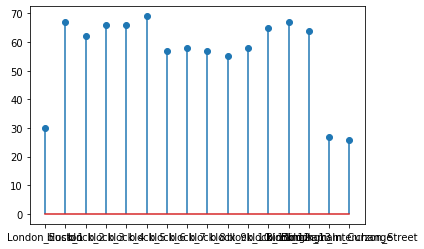

In [82]:

station = ['London_Euston','block_1','block_2','block_3','block_4','block_5','block_6','block_7','block_8','block_9','block_10','block_11','block_12','block_13','Birmingham_Interchange','Birmingham_Curzon_Street']

velocity_list = df_13[['London_Euston_velocity','velocity_block_1','velocity_block_2','velocity_block_3','velocity_block_4','velocity_block_5','velocity_block_6','velocity_block_7','velocity_block_8','velocity_block_9','velocity_block_10','velocity_block_11','velocity_block_12','velocity_block_13','Birmingham_Interchange_velocity','Birmingham_Curzon_Street_velocity']]
velocity_13 = velocity_list.head(1).values.tolist()[0]

plt.stem(station, velocity_13, use_line_collection=True)
plt.show()

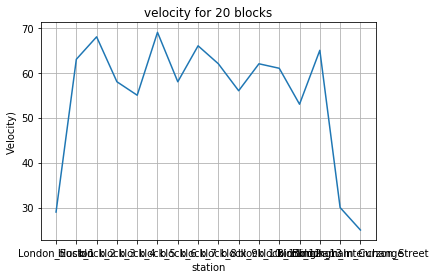

In [90]:
station = ['London_Euston','block_1','block_2','block_3','block_4','block_5','block_6','block_7','block_8','block_9','block_10','block_11','block_12','block_13','Birmingham_Interchange','Birmingham_Curzon_Street']

velocity_list = df_20[['London_Euston_velocity','velocity_block_1','velocity_block_2','velocity_block_3','velocity_block_4','velocity_block_5','velocity_block_6','velocity_block_7','velocity_block_8','velocity_block_9','velocity_block_10','velocity_block_11','velocity_block_12','velocity_block_13','Birmingham_Interchange_velocity','Birmingham_Curzon_Street_velocity']]
velocity_13 = velocity_list.head(1).values.tolist()[0]

fig, ax = plt.subplots()
ax.plot(station, velocity_13)

ax.set(xlabel='station', ylabel='Velocity)',
       title='velocity for 20 blocks')
ax.grid()

fig.savefig("test.png")
plt.show()

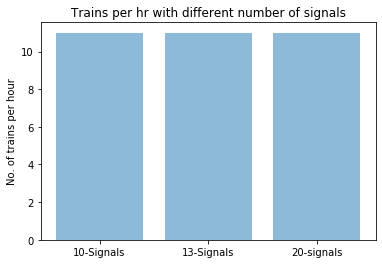

In [85]:
objects = ('10-Signals', '13-Signals', '20-signals')
y_pos = np.arange(len(objects))
performance = [len(df_13.index),len(df_20.index),len(df_20.index)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No. of trains per hour')
plt.title('Trains per hr with different number of signals')
plt.show()



In [77]:
df.head()


,London_Euston,London_Euston_velocity,block_1,velocity_block_1,block_2,velocity_block_2,block_3,velocity_block_3,block_4,velocity_block_4,...,block_18,velocity_block_18,block_19,velocity_block_19,block_20,velocity_block_20,Birmingham_Interchange,Birmingham_Interchange_velocity,Birmingham_Curzon_Street,Birmingham_Curzon_Street_velocity
train_no,,,,,,,,,,,,,,,,,,,,,
0,0,30,305,67,389.204,62,473.409,66,557.613,66,...,1736.48,69,1820.68,64,1904.88,65,1989.09,27,2529.09,26
390,390,27,695,69,779.204,69,863.409,60,947.613,56,...,2126.48,66,2210.68,68,2294.88,0,2410.88,28,2950.88,30
780,780,27,1085,59,1169.2,57,1253.41,56,1337.61,54,...,2516.48,65,2600.68,64,2684.88,67,2769.09,25,3309.09,30
1170,1170,27,1475,67,1559.2,68,1643.41,64,1727.61,53,...,2906.48,67,2990.68,58,3074.88,54,3159.09,25,3699.09,27
1560,1560,29,1865,58,1949.2,68,2033.41,65,2117.61,54,...,3296.48,59,3380.68,56,3464.88,67,3549.09,None,None,None
